# Actividad Regresión Logística: Pasa o no pasa

Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Cargado de datos

In [2]:
datos = pd.DataFrame(data={'Horas': [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5
                                     ], 'Pasa': [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]}, columns=['Horas', 'Pasa'])

Previsualización de los datos

In [3]:
datos

,Horas,Pasa
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,1
6,2.00,0
7,2.25,1
8,2.50,0
9,2.75,1


Separación de datos en X y Y

In [4]:
X = datos['Horas'].values.reshape(-1,1)
y = datos['Pasa'].values

Visualización de X

In [5]:
X

array([[0.5 ],
       [0.75],
       [1.  ],
       [1.25],
       [1.5 ],
       [1.75],
       [2.  ],
       [2.25],
       [2.5 ],
       [2.75],
       [3.  ],
       [3.25],
       [3.5 ],
       [3.75],
       [4.  ],
       [4.25],
       [4.5 ],
       [4.75],
       [5.  ],
       [5.25],
       [5.5 ]])

Visualización de y

In [6]:
y

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Creación del modelo de regresión logística

In [7]:
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression()

Ver los parámetros a y b del modelo

Recuerde que la ecuación es logit(Py)=a+bX

In [8]:
a = classifier.intercept_
b = classifier.coef_
print(f'a = {a}\nb = {b}')

a = [-2.87631546]
b = [[1.00716646]]


Predicciones binarias

In [9]:
xPred = np.array(4) # Un estudiante dedicó 4 horas a estudiar
xPred

array(4)

In [10]:
classifier.predict(xPred.reshape(-1,1))

array([1])

Predicciones probabilísticas

In [11]:
classifier.predict_proba(xPred.reshape(-1,1))

array([[0.24006004, 0.75993996]])

Predicciones de Y & Valores de probabilidad basados en el clasificador ajustado

In [12]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
y_prob = classifier.predict_proba(X)
y_prob

array([[0.91472423, 0.08527577],
       [0.8929219 , 0.1070781 ],
       [0.86635978, 0.13364022],
       [0.83443036, 0.16556964],
       [0.79666279, 0.20333721],
       [0.75283206, 0.24716794],
       [0.7030747 , 0.2969253 ],
       [0.64798435, 0.35201565],
       [0.5886529 , 0.4113471 ],
       [0.52662671, 0.47337329],
       [0.46376764, 0.53623236],
       [0.40203922, 0.59796078],
       [0.34326741, 0.65673259],
       [0.28893568, 0.71106432],
       [0.24006004, 0.75993996],
       [0.19715966, 0.80284034],
       [0.16030862, 0.83969138],
       [0.12923663, 0.87076337],
       [0.10344525, 0.89655475],
       [0.08231442, 0.91768558],
       [0.06518617, 0.93481383]])

La probabilidad es una arreglo (array) de 2 D, llamamos la curva de precisión.

In [14]:
precision, recall, thresholds = precision_recall_curve(y, y_prob[:,1])
#Devuelve el ratio de precisión y de recuperación

Elaboración del gráfico

(0.0, 1.0)

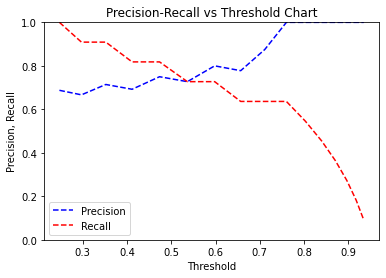

In [15]:
pr_auc = metrics.auc(recall, precision)
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

Tener presente que:
Precisión = True Positive / (True Positive + False Positive)
Recuperación = True Positive / (True Positive + False Negative)

In [16]:
y_train = y
y_pron = classifier.predict(X)

In [17]:
cm = confusion_matrix(y_train, y_pron)
cm

array([[7, 3],
       [3, 8]])

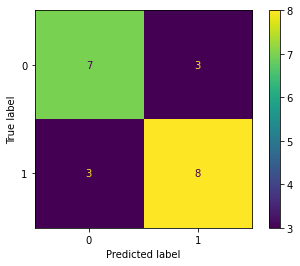

In [18]:
plot_confusion_matrix(classifier, X, y_train)
plt.show();